In [1]:
from qiskit import *

In [2]:
nqubits=3
circuit=QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

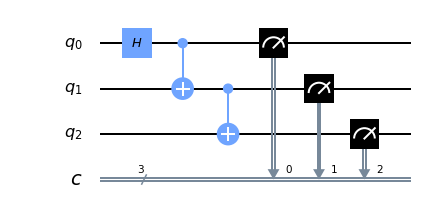

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
simulator=Aer.get_backend('qasm_simulator')
sim_result=execute(circuit,backend=simulator,shots=1024).result()


In [5]:
from qiskit.visualization import plot_histogram

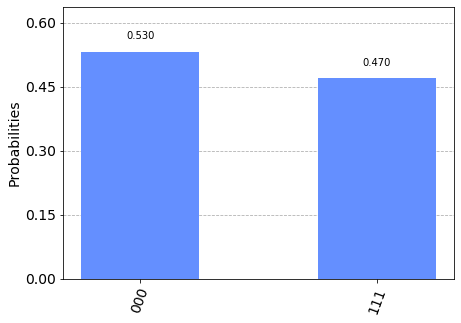

In [6]:
plot_histogram(sim_result.get_counts(circuit))

In [9]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
device=provider.get_backend('ibmqx2')

ibmqfactory.load_account:WARNING:2020-05-26 16:24:02,705: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
job=execute(circuit,backend=device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5eccf55504ac74001aac1998
Job Status: job has successfully run


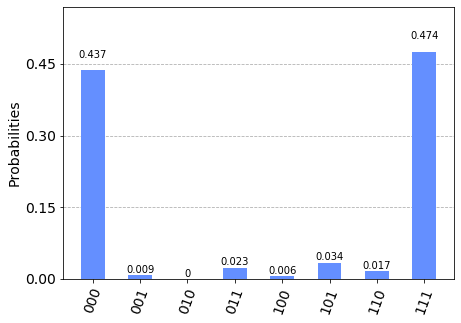

In [11]:
device_result=job.result()
plot_histogram(device_result.get_counts(circuit))

In [12]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels=complete_meas_cal(qr=circuit.gregs[0],circlabel='measerromitigationcal')
cal_circuits[2].draw(output='mpl')

AttributeError: 'QuantumCircuit' object has no attribute 'gregs'

In [13]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [14]:
cal_circuits, state_labels=complete_meas_cal(qr=circuit.gregs[0],circlabel='measerromitigationcal')


AttributeError: 'QuantumCircuit' object has no attribute 'gregs'

In [15]:
cal_circuits, state_labels=complete_meas_cal(qr=circuit.qregs[0],circlabel='measerromitigationcal')

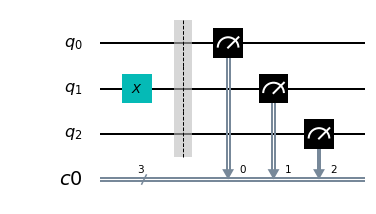

In [16]:
cal_circuits[2].draw(output='mpl')

In [17]:
len(cal_circuits)

8

In [18]:
cal_job=execute(cal_circuits,
                backend=device,
                shots=1024,
                optimization_level=0
               )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results=cal_job.result()
            

5eccfb23525e07001aa58c02
Job Status: job has successfully run


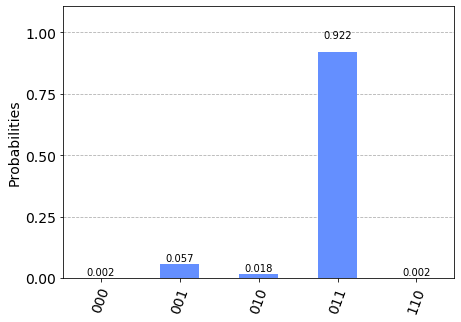

In [19]:
    plot_histogram(
    cal_results.get_counts(cal_circuits[3]))

In [20]:
meas_fitter=CompleteMeasFitter(cal_results, state_labels)

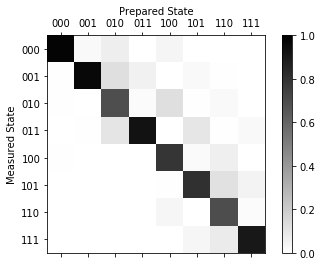

In [23]:
meas_fitter.plot_calibration()

In [24]:
meas_filter=meas_fitter.filter

In [26]:
mitigated_result=meas_filter.apply(device_result)

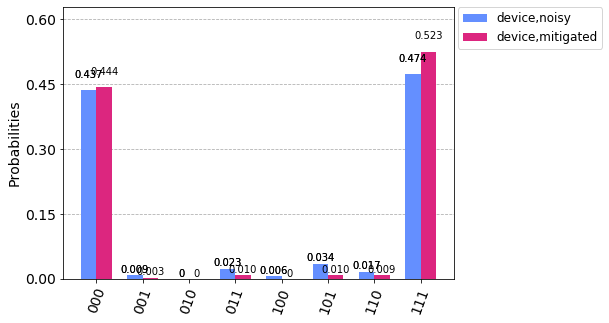

In [27]:
device_counts=device_result.get_counts(circuit)
mitigated_counts=mitigated_result.get_counts(circuit)
plot_histogram([device_counts,mitigated_counts],legend=['device,noisy','device,mitigated'])

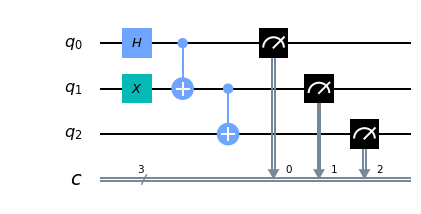

In [29]:
circuit2=QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')


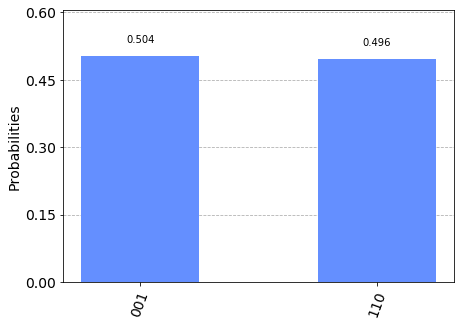

In [30]:
plot_histogram(

     execute(circuit2, backend=simulator,shots=1024).result().get_counts(circuit2)

)

In [31]:
device_counts_2=execute(circuit2,backend=device,shots=1024).result().get_counts()


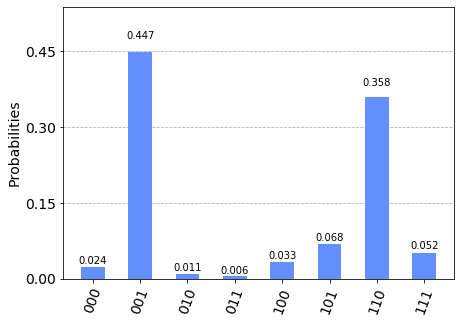

In [32]:
plot_histogram(device_counts_2)

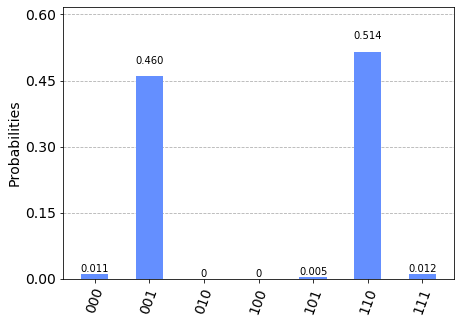

In [33]:
device_mitigated_counts_2=meas_filter.apply(device_counts_2)
plot_histogram(device_mitigated_counts_2)